In [1]:
from NMF import *
import numpy as np
import scipy.stats as stats
%matplotlib inline

**GENERATING SYNTHETIC DATA**

In [2]:
K = 4
F = 1025
N = 500
W = np.zeros((F, K))
H = np.zeros((K, N))

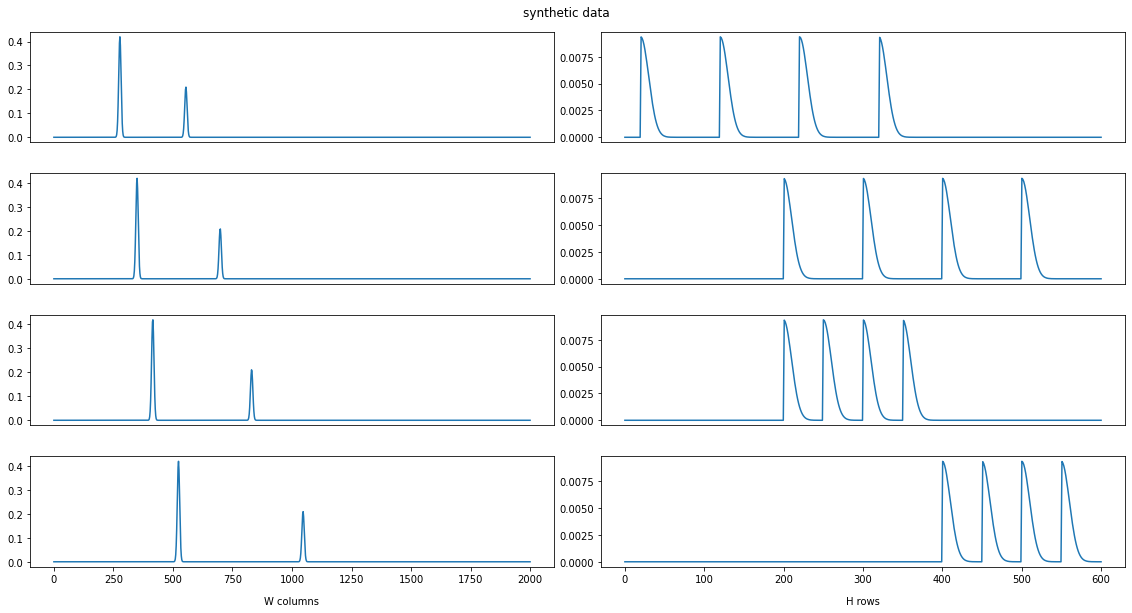

In [12]:
pitches = np.array([61, 65, 68, 72])
times_set = np.array([[20, 120, 220, 320],[200, 300, 400, 500],[200, 250, 300, 350],[400, 450, 500, 550]])
freq_set = 440 * np.power(2, (pitches - 69) / 12)

frequencies = np.linspace(0, 2000, F)
times = np.linspace(0, 600, N)

for i in range(4):
    W[:, i] = stats.norm.pdf(frequencies, loc=freq_set[i], scale=5) + 0.5 * stats.norm.pdf(frequencies, loc=2 * freq_set[i], scale=5) + 10**(-6)
    for j in range(4):
        H[i, :] += (times > times_set[i, j]) * stats.norm.pdf(times, loc=times_set[i, j], scale=10) + 10**(-6)
for k in range(K):
    norm_factor = np.linalg.norm(W[:, k])
    W[:, k] = W[:, k] / norm_factor
    H[k, :] = H[k, :] * norm_factor

fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 2))
fig.tight_layout(pad=1)
for i in range(K):
    axes[i, 0].plot(frequencies, W[:, i])
    axes[i, 1].plot(times, H[i, :])
    if i != (K - 1):
        axes[i, 0].xaxis.set_ticklabels([])
        axes[i, 1].xaxis.set_ticklabels([])
        axes[i, 0].tick_params(axis='x', length=0)
        axes[i, 1].tick_params(axis='x', length=0)
    if i == K - 1:
        axes[i, 0].set_xlabel("W columns", labelpad=12)
        axes[i, 1].set_xlabel("H rows", labelpad=12)
fig.suptitle("synthetic data", y=1.02)
plt.show()

In [7]:
V = W @ H
spec = Spectrogram(V, frequencies)

**KL_NMF**

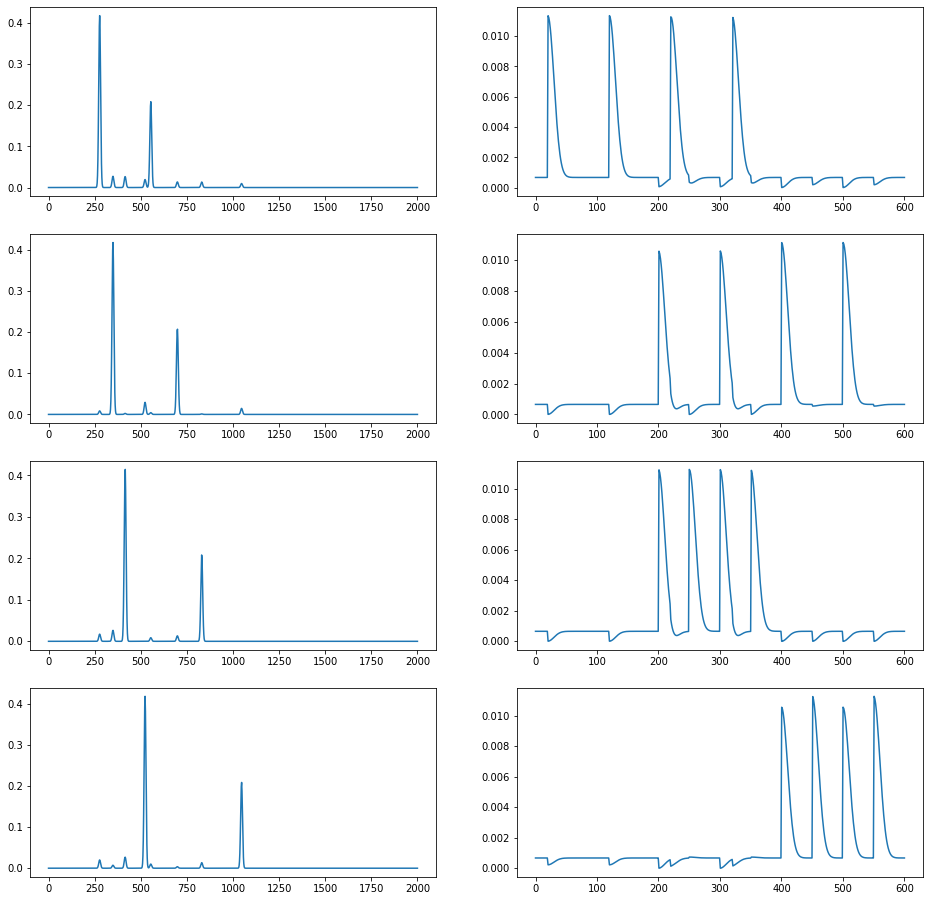

[61. 53. 68. 72.]


In [73]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_KL(K, 3000)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

**EUC_NMF**

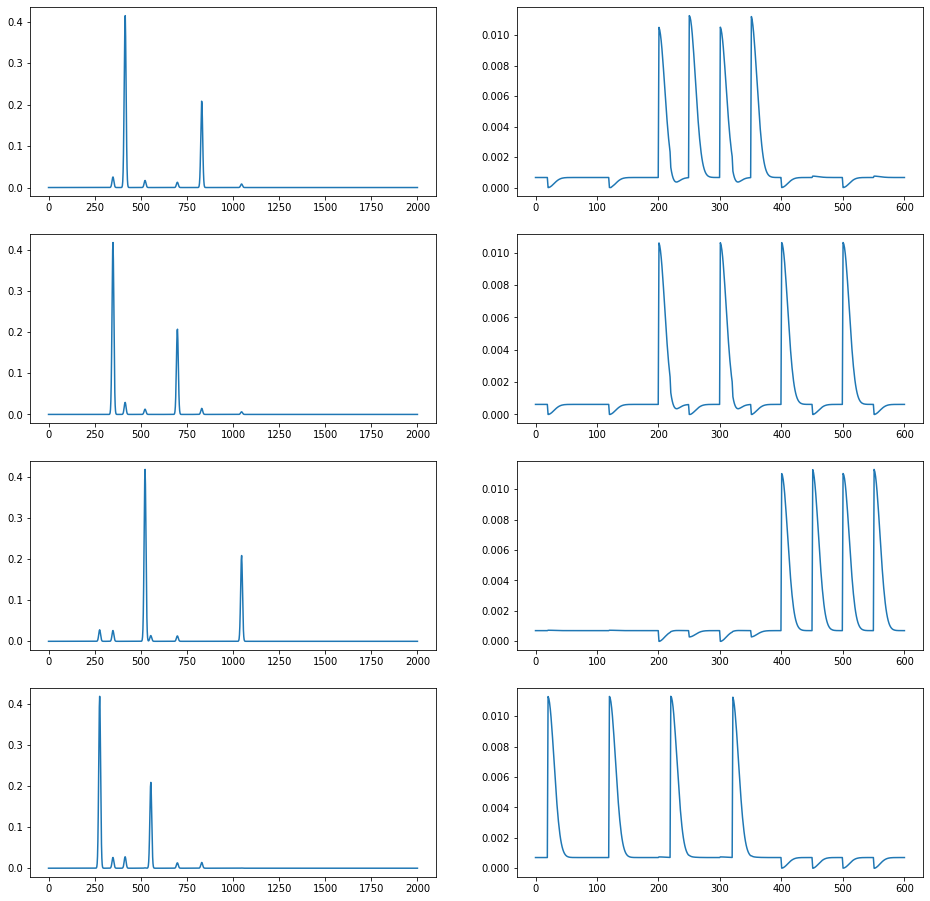

[68. 65. 60. 61.]


In [74]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_EUC(K, 3000)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

**IS_MU_NMF**

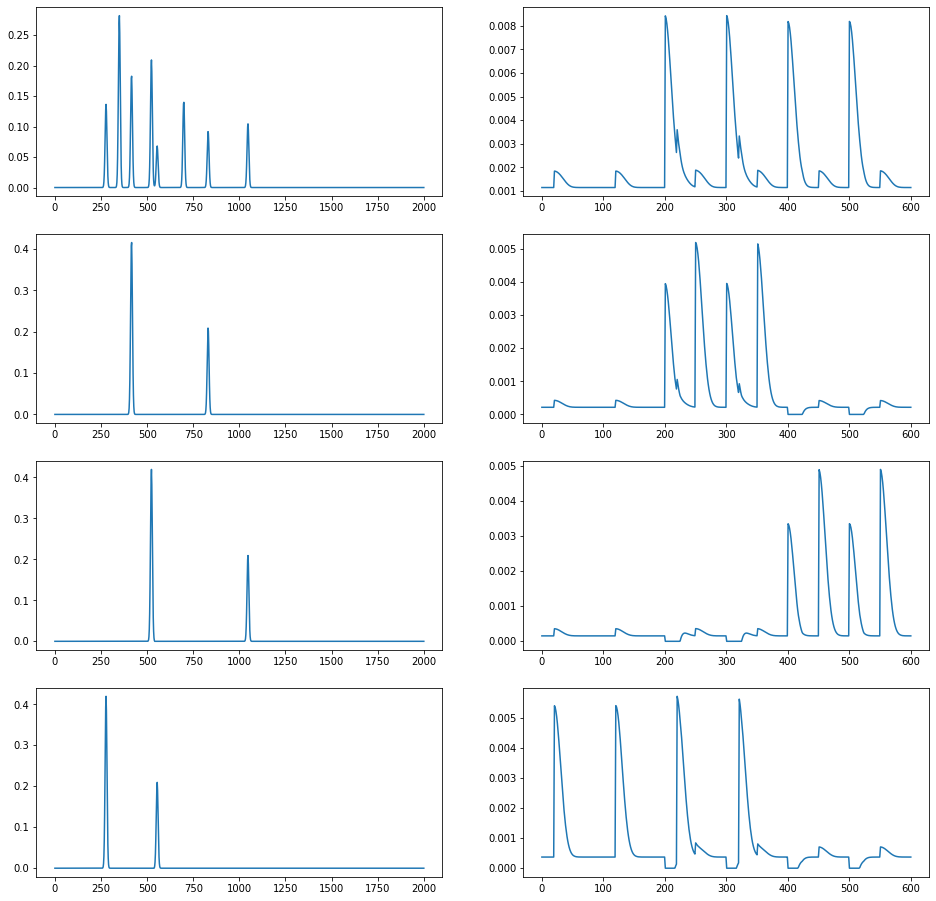

[108.4  68.   72.   61. ]


In [75]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_MU_IS(K, 3000)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

**EM_IS_NMF**

/home/maria/MachineLearning/NMF.py:396: RuntimeWarning: invalid value encountered in log
  return (x + 1e-09) / (y+1e-09) - (np.log(x+1e-09) - np.log(y+1e-09)) - 1


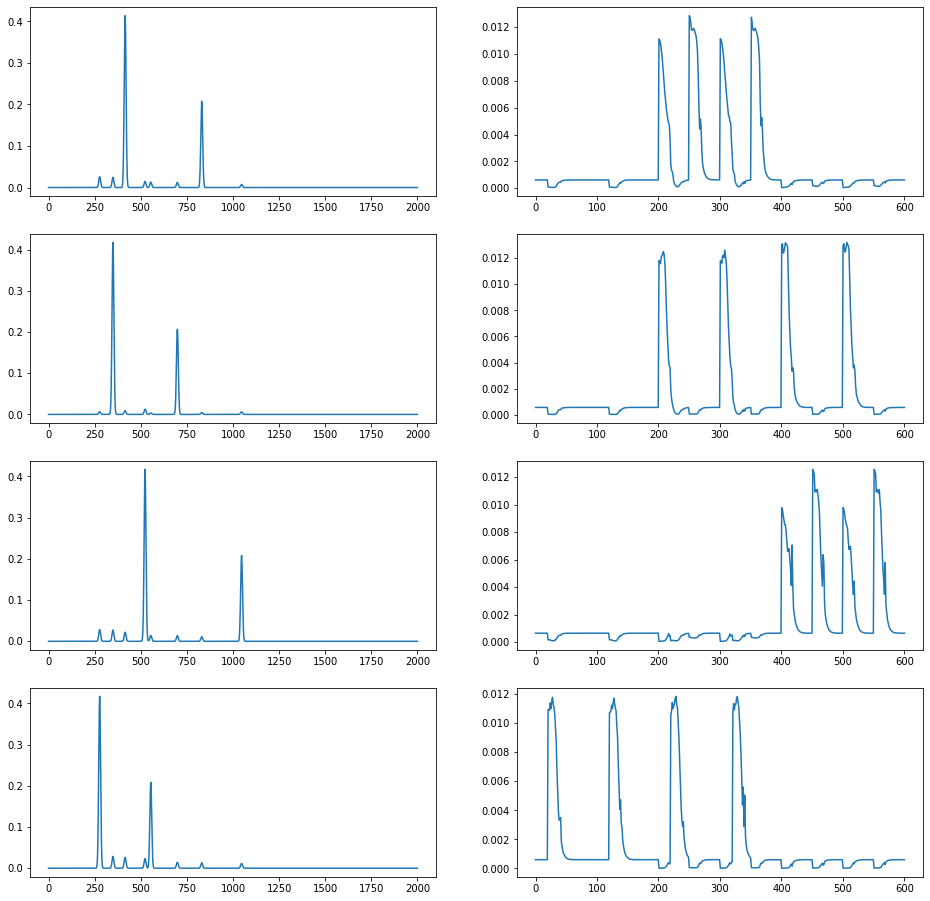

[68. 65. 60. 61.]


In [76]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_EM_IS(K, 3000)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

**SUMMARY PLOT**

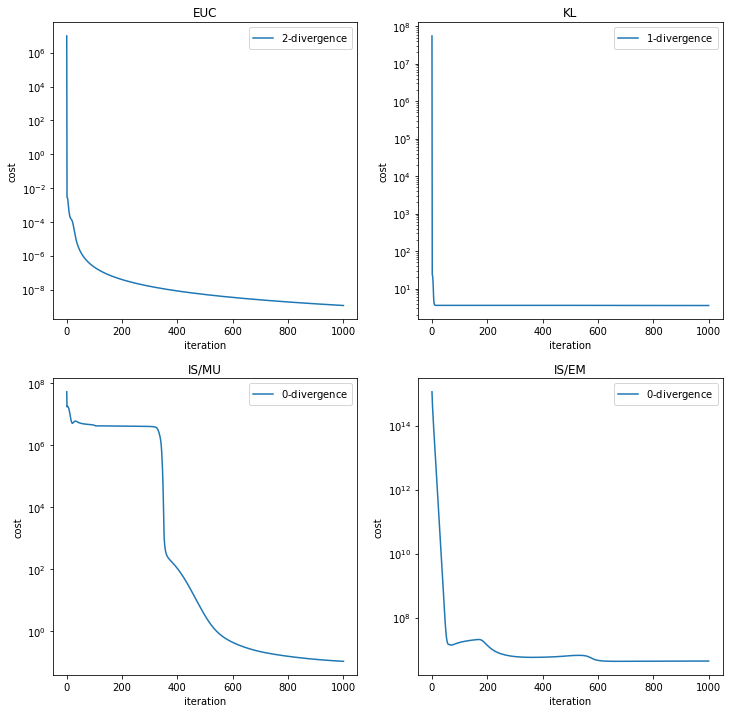

In [14]:
K = 4
matrix_to_factorize = NMF(V)
costs = matrix_to_factorize.summary_plot(K, 1000)

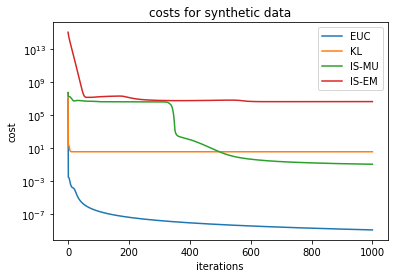

In [15]:
plt.semilogy(costs[0], label="EUC")
plt.semilogy(costs[1], label="KL")
plt.semilogy(costs[2], label="IS-MU")
plt.semilogy(costs[3], label="IS-EM")
plt.legend()
plt.title("costs for synthetic data")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.show()